In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("customer_profiles.csv")

In [7]:
X = data[['income']].values

In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [10]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 1
Estimated number of noise points: 0


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [11]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

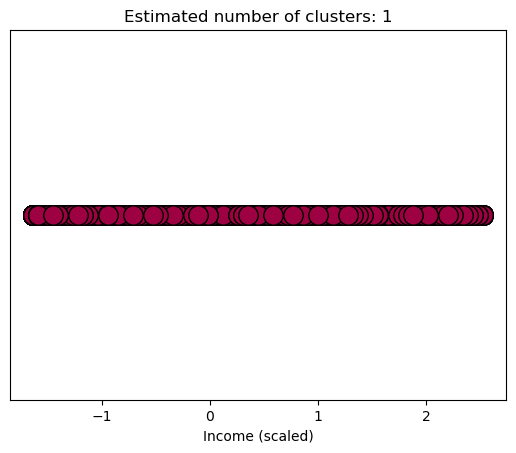

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], np.zeros_like(xy[:, 0]), 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], np.zeros_like(xy[:, 0]), 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('Income (scaled)')
plt.yticks([])
plt.show()

Number of clusters: 1
Silhouette Coefficient: 0.430


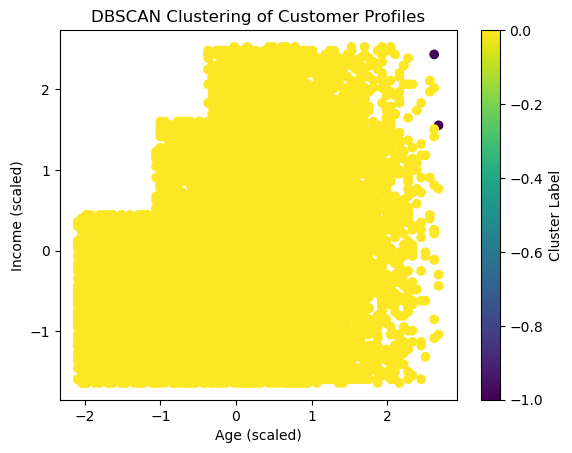

In [14]:
# Adjusting the provided code to fit the customer data
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

# Load the customer profiles dataset
file_path = 'customer_profiles.csv'
data = pd.read_csv(file_path)

# For demonstration, let's use two numerical features: 'age' and 'income'
# Ensure these features exist in your dataset and are appropriately named
features = data[['age', 'income']]  # Adjust as necessary for your dataset

# Scale the features to have mean=0 and variance=1
X_scaled = StandardScaler().fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_pred = dbscan.fit_predict(X_scaled)

# Visualize the clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.title('DBSCAN Clustering of Customer Profiles')
plt.xlabel('Age (scaled)')
plt.ylabel('Income (scaled)')
plt.colorbar(label='Cluster Label')

# Evaluate clustering performance
# Note: Adjusted Rand Index and Adjusted Mutual Information require true labels, which we might not have
print('Number of clusters:', len(set(y_pred[np.where(y_pred != -1)])))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, y_pred))

plt.show()


Number of clusters: 1
Silhouette Coefficient: 0.430


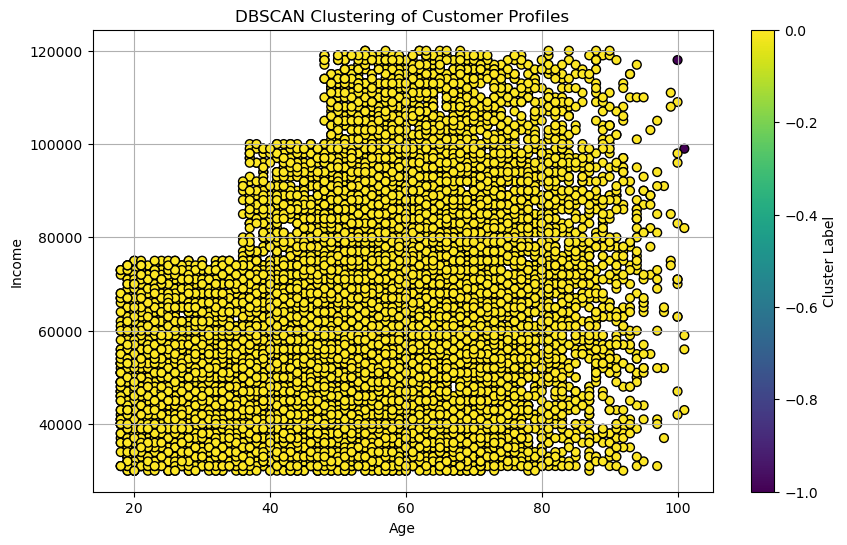

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming the dataset is loaded into 'data'
# Let's say 'age' and 'income' are the features you're interested in
features = data[['age', 'income']]

# Scale the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply DBSCAN on the scaled data
dbscan = DBSCAN(eps=0.3, min_samples=10)
y_pred = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise)
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)

# Plotting the original data but color by the cluster labels from DBSCAN
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features['age'], features['income'], c=y_pred, cmap='viridis', edgecolor='k', s=40)
plt.title('DBSCAN Clustering of Customer Profiles')
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)

# Printing clustering metrics
print('Number of clusters:', n_clusters)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_scaled, y_pred))

plt.show()
